In [3]:
import pandas as pd

# Load the Excel file
data = pd.read_excel('NBA Stats.xlsx')

# Display the first few rows
data.head()


,Rank,Player,Team,Age,GP,W,L,Min,Points,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plus/Minus
0,1,Joel Embiid,PHI,30,39,31,8,33.6,34.7,11.5,...,11.0,5.6,3.8,1.2,1.7,2.9,61.1,30,2,6.8
1,2,Luka Doncic,DAL,25,70,46,24,37.5,33.9,11.5,...,9.2,9.8,4.0,1.4,0.5,2.1,61.5,49,21,4.6
2,3,Giannis Antetokounmpo,MIL,29,73,45,28,35.2,30.4,11.5,...,11.5,6.5,3.4,1.2,1.1,2.9,57.4,57,10,4.6
3,4,Shai Gilgeous-Alexander,OKC,25,75,55,20,34.0,30.1,10.6,...,5.5,6.2,2.2,2.0,0.9,2.5,52.5,8,0,8.2
4,5,Jalen Brunson,NYK,27,77,49,28,35.4,28.7,10.3,...,3.6,6.7,2.4,0.9,0.2,1.9,44.0,9,0,6.6


In [15]:
import pandas as pd

# Load each relevant sheet from the file
regular_traditional = pd.read_excel('NBA Stats.xlsx', sheet_name='General Trad. Stats')
regular_advanced = pd.read_excel('NBA Stats.xlsx', sheet_name='General Advanced Stats')
clutch_traditional = pd.read_excel('NBA Stats.xlsx', sheet_name='"Clutch Time" Trad. Stats')
clutch_advanced = pd.read_excel('NBA Stats.xlsx', sheet_name='"Clutch Time" Advanced Stats')

# Create a new DataFrame to hold player data and clutch score calculations
data = pd.DataFrame()
data['Player'] = clutch_advanced['Player']  # Assumes player names match across sheets

# Calculate differentials for each relevant stat
# Points Differential
data['Points Differential'] = clutch_advanced['PTS'] - regular_advanced['PTS']
# Field Goal Percentage Differential
data['FG% Differential'] = clutch_advanced['FG%'] - regular_advanced['FG%']
# Free Throw Percentage Differential
data['FT% Differential'] = clutch_advanced['FT%'] - regular_advanced['FT%']
# Assists Differential
data['Assists Differential'] = clutch_advanced['AST'] - regular_advanced['AST']
# Turnovers Differential (penalized if higher in clutch time)
data['Turnovers Differential'] = clutch_advanced['TOV'] - regular_advanced['TOV']

# Calculate the clutch score based on weighted differentials
data['Clutch Score'] = (
    0.3 * data['Points Differential'] +
    0.2 * data['FG% Differential'] +
    0.2 * data['FT% Differential'] +
    0.15 * data['Assists Differential'] -
    0.15 * data['Turnovers Differential']
)

# Sort players by Clutch Score in descending order
data = data.sort_values(by='Clutch Score', ascending=False)
data[['Player', 'Clutch Score']]



KeyError: 'PTS'

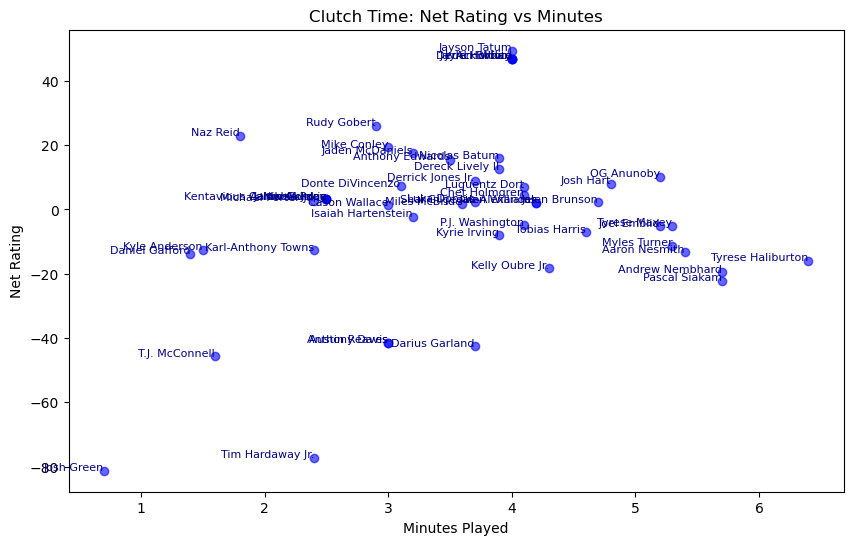

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Clutch Advanced Stats sheet
clutch_advanced = pd.read_excel('NBA Stats.xlsx', sheet_name='"Clutch Time" Advanced Stats')

# Filter out rows with missing values in MIN or NETRTG
filtered_data = clutch_advanced.dropna(subset=['MIN', 'NETRTG'])

# Create a scatter plot with player names displayed
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['MIN'], filtered_data['NETRTG'], color='blue', alpha=0.6)
plt.title('Clutch Time: Net Rating vs Minutes')
plt.xlabel('Minutes Played')
plt.ylabel('Net Rating')

# Add player names next to each data point
for i, row in filtered_data.iterrows():
    plt.text(row['MIN'], row['NETRTG'], row['Player'], fontsize=8, ha='right', color='darkblue')

plt.show()


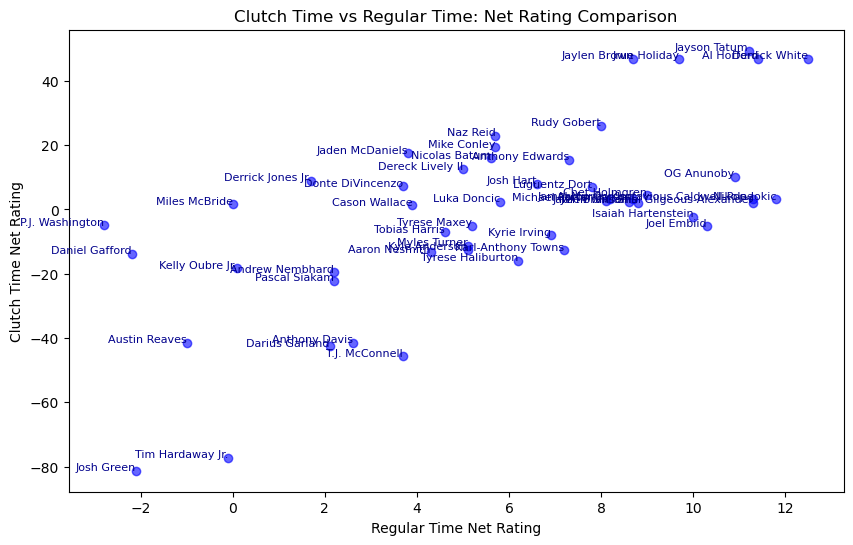

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Clutch Advanced Stats sheet
clutch_advanced = pd.read_excel('NBA Stats.xlsx', sheet_name='"Clutch Time" Advanced Stats')

# Load the Regular Advanced Stats sheet
regular_advanced = pd.read_excel('NBA Stats.xlsx', sheet_name='General Advanced Stats')

# Merge the Clutch and Regular time data on player name
merged_data = pd.merge(clutch_advanced[['Player', 'NETRTG', 'MIN']], 
                       regular_advanced[['Player', 'NETRTG']], 
                       on='Player', 
                       suffixes=('_Clutch', '_Regular'))

# Filter out rows with missing values in either NETRTG
filtered_data = merged_data.dropna(subset=['NETRTG_Clutch', 'NETRTG_Regular'])

# Create a scatter plot comparing Clutch vs Regular time performance
plt.figure(figsize=(10, 6))

# Scatter plot for Clutch Time vs Regular Time NETRTG
plt.scatter(filtered_data['NETRTG_Regular'], filtered_data['NETRTG_Clutch'], color='blue', alpha=0.6)

plt.title('Clutch Time vs Regular Time: Net Rating Comparison')
plt.xlabel('Regular Time Net Rating')
plt.ylabel('Clutch Time Net Rating')

# Add player names next to each data point
for i, row in filtered_data.iterrows():
    plt.text(row['NETRTG_Regular'], row['NETRTG_Clutch'], row['Player'], fontsize=8, ha='right', color='darkblue')

plt.show()


In [29]:
import pandas as pd

# Load the Clutch Advanced Stats sheet
clutch_advanced = pd.read_excel('NBA Stats.xlsx', sheet_name='"Clutch Time" Advanced Stats')

# Load the General Advanced Stats (Regular Time) sheet
general_advanced = pd.read_excel('NBA Stats.xlsx', sheet_name='General Advanced Stats')

# Merge the Clutch and Regular time data on player name
merged_data = pd.merge(
    clutch_advanced[['Player', 'NETRTG', 'MIN']], 
    general_advanced[['Player', 'NETRTG']], 
    on='Player', 
    suffixes=('_Clutch', '_Regular')
)

# Filter out rows with missing values in either NETRTG
filtered_data = merged_data.dropna(subset=['NETRTG_Clutch', 'NETRTG_Regular'])

# Calculate the Clutch Score as the difference between Clutch and Regular time NETRTG
filtered_data['Clutch Score'] = filtered_data['NETRTG_Clutch'] - filtered_data['NETRTG_Regular']

# Sort by Clutch Score (optional)
filtered_data = filtered_data.sort_values(by='Clutch Score', ascending=False)

# Display the top 10 players with the highest Clutch Scores
print(filtered_data[['Player', 'NETRTG_Clutch', 'NETRTG_Regular', 'Clutch Score']].head(10))



             Player  NETRTG_Clutch  NETRTG_Regular  Clutch Score
23     Jayson Tatum           49.4            11.2          38.2
22     Jaylen Brown           46.9             8.7          38.2
24     Jrue Holiday           46.9             9.7          37.2
18       Al Horford           46.9            11.4          35.5
20    Derrick White           46.9            12.5          34.4
17      Rudy Gobert           26.1             8.0          18.1
26         Naz Reid           22.9             5.7          17.2
11  Jaden McDaniels           17.6             3.8          13.8
13      Mike Conley           19.4             5.7          13.7
39    Nicolas Batum           15.9             5.6          10.3


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Clutch Advanced Stats sheet
clutch_advanced = pd.read_excel('NBA Stats.xlsx', sheet_name='"Clutch Time" Advanced Stats')

# Load the General Advanced Stats (Regular Time) sheet
general_advanced = pd.read_excel('NBA Stats.xlsx', sheet_name='General Advanced Stats')

# Merge the Clutch and Regular time data on player name
merged_data = pd.merge(
    clutch_advanced[['Player', 'NETRTG', 'MIN', 'Points', 'Assists', 'Rebounds']],  # List all stats
    general_advanced[['Player', 'NETRTG', 'MIN', 'Points', 'Assists', 'Rebounds']], 
    on='Player', 
    suffixes=('_Clutch', '_Regular')
)

# Filter out rows with missing values in either NETRTG
filtered_data = merged_data.dropna(subset=['NETRTG_Clutch', 'NETRTG_Regular'])

# Calculate the difference for each stat (Clutch - Regular) for performance comparison
filtered_data['Points_Difference'] = filtered_data['Points_Clutch'] - filtered_data['Points_Regular']
filtered_data['Assists_Difference'] = filtered_data['Assists_Clutch'] - filtered_data['Assists_Regular']
filtered_data['Rebounds_Difference'] = filtered_data['Rebounds_Clutch'] - filtered_data['Rebounds_Regular']

# Normalize by minutes played (Optional)
filtered_data['Points_per_minute_Clutch'] = filtered_data['Points_Clutch'] / filtered_data['MIN_Clutch']
filtered_data['Points_per_minute_Regular'] = filtered_data['Points_Regular'] / filtered_data['MIN_Regular']
filtered_data['Assists_per_minute_Clutch'] = filtered_data['Assists_Clutch'] / filtered_data['MIN_Clutch']
filtered_data['Assists_per_minute_Regular'] = filtered_data['Assists_Regular'] / filtered_data['MIN_Regular']
filtered_data['Rebounds_per_minute_Clutch'] = filtered_data['Rebounds_Clutch'] / filtered_data['MIN_Clutch']
filtered_data['Rebounds_per_minute_Regular'] = filtered_data['Rebounds_Regular'] / filtered_data['MIN_Regular']

# Display the differences
print(filtered_data[['Player', 'Points_Difference', 'Assists_Difference', 'Rebounds_Difference']].head(10))

# Create a bar plot to compare the differences in stats for Clutch vs Regular time
stats = ['Points_Difference', 'Assists_Difference', 'Rebounds_Difference']
filtered_data[stats].plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title('Difference Between Clutch and Regular Time Stats')
plt.ylabel('Difference (Clutch - Regular)')
plt.xticks(range(len(filtered_data)), filtered_data['Player'], rotation=90)
plt.tight_layout()
plt.show()

# Create a scatter plot for per-minute comparisons (Clutch vs Regular)
plt.figure(figsize=(10, 6))

plt.scatter(filtered_data['Points_per_minute_Regular'], filtered_data['Points_per_minute_Clutch'], color='blue', alpha=0.6)
plt.title('Per-Minute Comparison: Points Clutch vs Regular')
plt.xlabel('Points per Minute (Regular Time)')
plt.ylabel('Points per Minute (Clutch Time)')

# Add player names next to each data point
for i, row in filtered_data.iterrows():
    plt.text(row['Points_per_minute_Regular'], row['Points_per_minute_Clutch'], row['Player'], fontsize=8, ha='right', color='darkblue')

plt.show()


KeyError: "['Points', 'Assists', 'Rebounds'] not in index"

In [39]:
# Load the Clutch and Regular time data
clutch_advanced = pd.read_excel('NBA Stats.xlsx', sheet_name='"Clutch Time" Advanced Stats')
general_advanced = pd.read_excel('NBA Stats.xlsx', sheet_name='General Advanced Stats')

# Print the column names for each dataframe to inspect them
print("Clutch Time Columns:")
print(clutch_advanced.columns)

print("\nRegular Time Columns:")
print(general_advanced.columns)


Clutch Time Columns:
Index(['Unnamed: 0', 'Player', 'Team', 'Age', 'GP', 'W', 'L', 'MIN', 'OFFRTG',
       'DEFRTG', 'NETRTG', 'AST%', 'AST/TO', 'AST RATIO', 'OREB%', 'DREB%',
       'REB%', 'TO Ratio', 'EFG%', 'TS%', 'USG%', 'PACE', 'PIE', 'POSS'],
      dtype='object')

Regular Time Columns:
Index(['Unnamed: 0', 'Player', 'Team', 'Age', 'GP', 'W', 'L', 'MIN', 'OFFRTG',
       'DEFRTG', 'NETRTG', 'AST%', 'AST/TO', 'AST RATIO', 'OREB%', 'DREB%',
       'REB%', 'TO Ratio', 'EFG%', 'TS%', 'USG%', 'PACE', 'PIE', 'POSS'],
      dtype='object')


In [53]:
import pandas as pd

# Load the Clutch and Regular time data (Traditional Stats)
clutch_traditional = pd.read_excel('NBA Stats.xlsx', sheet_name='"Clutch Time" Trad. Stats')
general_traditional = pd.read_excel('NBA Stats.xlsx', sheet_name='General Trad. Stats')
general_advanced = pd.read_excel('NBA Stats.xlsx', sheet_name='General Advanced Stats')
clutch_advanced = pd.read_excel('NBA Stats.xlsx', sheet_name='"Clutch Time" Advanced Stats')

# Print the column names for each dataframe to inspect them
print("Clutch Time Traditional Stats Columns:")
print(clutch_traditional.columns)

print("\nRegular Time Traditional Stats Columns:")
print(general_traditional.columns)
                                
print("\nRegular Time Advanced Stats Columns:")
print(general_advanced.columns)
                                
print("\nClutch Time Advanced Stats Columns:")
print(clutch_advanced.columns)


Clutch Time Traditional Stats Columns:
Index(['Unnamed: 0', 'Player', 'Team', 'Age', 'GP', 'W', 'L', 'Min', 'PTS',
       'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3',
       '+/-'],
      dtype='object')

Regular Time Traditional Stats Columns:
Index(['Rank', 'Player', 'Team', 'Age', 'GP', 'W', 'L', 'Min', 'Points', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3',
       'Plus/Minus'],
      dtype='object')

Regular Time Advanced Stats Columns:
Index(['Unnamed: 0', 'Player', 'Team', 'Age', 'GP', 'W', 'L', 'MIN', 'OFFRTG',
       'DEFRTG', 'NETRTG', 'AST%', 'AST/TO', 'AST RATIO', 'OREB%', 'DREB%',
       'REB%', 'TO Ratio', 'EFG%', 'TS%', 'USG%', 'PACE', 'PIE', 'POSS'],
      dtype='object')

Clutch Time Advanced Stats Columns:
Index(['Unnamed: 0', 'Player', 'Team', 'Age', 'GP', 'W',